# ML - Final - 2023

## Instruction

- Modify this file to be Final-<Your FirstName-[First Letter of Last Name]>, e.g., <code>Final-Chaklam-S.ipynb</code>
- This exam is open-booked; open-internet, but no interactions with human beings or ChatGPT.
- The completed exams shall be submitted at the virtual learning environment.
- All code should be **complemented with comments**, unless it's really obvious.  **We reserve the privilege to give you zero for any part of the question where the benefit of doubt is not justified**

# Coding

#### Summary
In this section, you will be dealing with a classification problem. You will be generating your own data, training and evaluating them. You will be asked to create a neural network according to the instructions.

The generating data will be a 2d-data `(28, 28)` being arranged similar to the input shape of `nn.Conv2d` with channel = 1, height = 28 and width = 28 `(batch_size, channel, height, width)`

You will then be asked to create a network consisting of 2 `nn.Conv2d` layers followed by a `nn.Linear` layer. After the `nn.Linear` layer, we send the data to a `nn.LSTM` layer where `num_layer` and `hidden_size` can be defined. This `hidden_size` is set to be the same as `num_classes`. The output of lstm is then directly returned.

Import Libraries

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models # add models to the list
from torchvision.utils import make_grid
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Generate a 4 class 2d-data with 70000 samples. (10 points)
- Class 0 data is sampled from a normal distribution with mean = 0, std = 1, size = `(28,28)`
- Class 1 data is sampled from a normal distribution with mean = 5, std = 1, size = `(28,28)`
- Class 2 data is sampled from a normal distribution with mean = 15, std = 1, size = `(28,28)`
- Class 3 data is sampled from a normal distribution with mean = 20, std = 1, size = `(28,28)`

The final shape of *x* should be `(70000, 1, 28, 28)` and *y* should be `(70000,)`

In case you are unable to do question 1, Use the following lines of code to generate your data and continue with question 3. But be aware that no marks will be given to question 1 and question 2

In [1]:
import torchvision
training_data = torchvision.datasets.MNIST('./data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ]))

testing_data  = torchvision.datasets.MNIST('./data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ]))

100%|██████████| 9912422/9912422 [00:00<00:00, 21421934.16it/s]


Extracting ./data/MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\raw



100%|██████████| 28881/28881 [00:00<?, ?it/s]


Extracting ./data/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 11013618.17it/s]


Extracting ./data/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\raw


2. Split your data into train and test with the split ratio of 1/7 (5 points)

In [ ]:
#train_set, test_set = torch.utils.data.random_split(data, [60000, 10000])

3. Check the size of your train and test sets (5 points)

In [4]:
len(training_data), len(testing_data)

(60000, 10000)

4. Set up your train and test loader with a batch size of 32 and `shuffle = True` (10 points)

In [5]:
torch.manual_seed(370)
training_dl = DataLoader(training_data, batch_size=32, shuffle=True)
testing_dl = DataLoader(testing_data, batch_size=32, shuffle=True) # usualy for test data batch size is total sample and no need to shufle

5. Check the shape of your batch. It should be `[batchsize = 32, channel = 1, height = 28, width = 28]` (5 points)

In [6]:
for image, label in training_dl:
    print(image.shape) #(bs, ch, h, w)
    print(label.shape) #(bs,         )
    break

torch.Size([32, 1, 28, 28])
torch.Size([32])


6. Plot 6 samples of any classes (10 points)

torch.Size([1, 28, 28]) torch.Size([])
torch.Size([1, 28, 28]) torch.Size([])
torch.Size([1, 28, 28]) torch.Size([])
torch.Size([1, 28, 28]) torch.Size([])
torch.Size([1, 28, 28]) torch.Size([])
torch.Size([1, 28, 28]) torch.Size([])


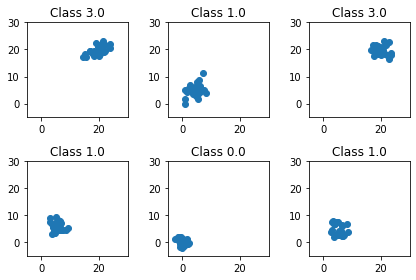

If you use MNIST

5

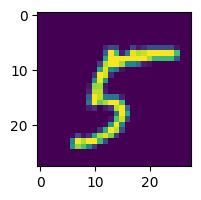

In [14]:
for images, labels in training_dl:  
    break

the_image = images[0]

the_image = np.transpose(the_image, (1, 2, 0))
the_image.shape
plt.figure(figsize=(2, 2))
plt.imshow(the_image) #(h, w, c)

labels[0].item()

7. Configure your device. (5 points)

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

8. Define your class called `Net` with the following layers (40 points)
- cnn2d layer 1 with `in_channel = 1`, `out_channel = 10`, `kernel size = 5`, dropout of `p = 0.5`, `maxpool` and `relu` as its activation function
- cnn2d layer 2 with `in_channel = 10`, `out_channel = 20`, `kernel size = 5`, dropout of `p = 0.5`, `maxpool` and `relu` as its activation function
- linear layer with output of 25
- lstm with `num_layer = 2` and set hidden size to be num_classes




In [116]:
class Net(nn.Module):
    def __init__(self, input_size = 1, hidden_size = 10, output_size = 1):
        super().__init__()
        self.l1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)
        self.l2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5)
        self.fc1 = nn.Linear(20*4*4, 25)
        self.lstm = nn.LSTM(input_size=25, hidden_size=10, num_layers=2)
      
    def forward(self, image):
        out = F.relu(self.l1(image))
        out = F.max_pool2d(out,2,2)
        out = F.dropout2d(out, p=0.5)
        out = F.relu(self.l2(out))
        out = F.max_pool2d(out, 2,2)
        out = F.dropout2d(out, p = 0.5)
        out = out.reshape((-1, 20*4*4))
        out = self.fc1(out)
        out = self.lstm(out)
        return out[0]

9. Create a model object with `num_layers of lstm = 2`, `hidden_size` and `num_classes = 4` (10 points)

If you use MNIST hidden_size and  `num_classes = 10`


In [117]:
model = Net()
output = model(images)
output.size()

torch.Size([32, 10])

In [118]:
for images, labels in training_dl:
            y_hat = model(images)
            

10. Define an appropriate loss function for classification of this dataset (2.5 points)

In [119]:
criteria = nn.CrossEntropyLoss()


11. Define your optimizer as `Adam` with learning rate of `0.001` (5 points)

In [120]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

12. Define your train function and train your model with `n_epoch = 3` (15 points)

In [123]:
num_epochs = 3
for i in range(num_epochs):
    train_correct = 0
    for images, labels in training_dl:
        y_hat = model(images)
        loss = criteria(y_hat, labels)

        real_pred = torch.max(y_hat, 1)[1]
        train_correct  += (real_pred == labels).sum()/images.shape[0]
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f"Epoch: {i} | Train acc: {train_correct/len(training_dl):3.2f} | Loss: {loss.item():3.4f}")

Epoch: 0 | Train acc: 0.92 | Loss: 1.1041
Epoch: 1 | Train acc: 0.92 | Loss: 1.1040
Epoch: 2 | Train acc: 0.92 | Loss: 1.1511


13. Plot your train losses and accuracies (10 points)

14. Evaluate your model with your test set (10 points)

In [130]:
model.eval() #this will turn off dropout, batch norm
with torch.no_grad():  #this will turn off gradient calculations
    for images, labels in testing_dl:
        y_hat = model(images)
        loss = criteria(y_hat, labels)
        
print("Cross Entrophy Loss: ", loss.item())

Cross Entrophy Loss:  1.01459538936615
